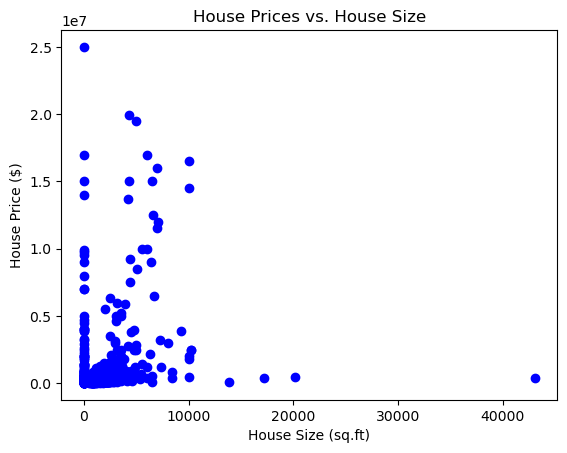

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load data from CSV file
data = pd.read_csv('realtor-data.csv')
 
# Extract features and target variable
house_sizes = data ['house_size'].values
house_prices = data['price'].values

# Visualize the data
plt.scatter(house_sizes, house_prices, marker ='o', color ='blue')
plt.title('House Prices vs. House Size')
plt.xlabel('House Size (sq.ft)')
plt.ylabel('House Price ($)')
plt.show()

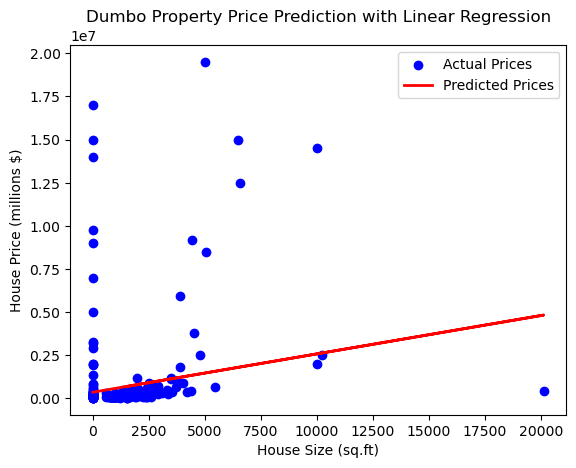

In [7]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(house_sizes, house_prices, test_size=0.2, random_state=42)

# Reshape the data for NumPy
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

# Create an imputer to handle NaN values
# Strategy 'mean' replaces NaN with the mean value of the column
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
x_train = imputer.fit_transform(x_train)

# Transform the test data
x_test = imputer.transform(x_test)

# Create and train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict prices for the test set
predictions = model.predict(x_test)

# Visualize the predictions
plt.scatter(x_test, y_test, marker='o', color='blue', label='Actual Prices')
plt.plot(x_test, predictions, color='red', linewidth=2, label='Predicted Prices')
plt.title('Dumbo Property Price Prediction with Linear Regression')
plt.xlabel('House Size (sq.ft)')
plt.ylabel('House Price (millions $)')
plt.legend()
plt.show()